In [8]:
import matplotlib.pyplot as plt
import numpy as np
from constraint import Problem
from random import randint
import copy
from operations import addition, multiplication, division, zero
from problem_constraints import add_constraint_for_addition, add_constraint_for_division, add_constraint_for_multiplication, add_constraint_for_zero

In [9]:
def get_solutions_for_one_variable(problem: Problem, var: str):
    solution_dicts = problem.getSolutions()
    target_solutions = {solution_dict[var] for solution_dict in solution_dicts}
    return target_solutions

def show_plots(x, y):
    # Create the plot
    plt.plot(x, y, marker='o', linestyle='-')

    # Add labels and title
    plt.xlabel("X value")
    plt.ylabel("Possibilities")
    plt.title("Possibilities per K values")

    # Display the plot
    plt.show()

In [529]:
import matplotlib.pyplot as plt
from collections import Counter

class OperationTracker:
    def __init__(self, operation_names=None):
        self.history = []
        self.operation_names = operation_names or ['Op 0', 'Op 1', 'Op 2', 'Op 3']
    
    def add(self, simulation):
        """
        simulation: [98, 80, 100, 100] - remaining solutions for each operation
        Returns: index of best operation (smallest number)
        """
        best_idx = simulation.index(min(simulation))
        worst_idx = simulation.index(max(simulation))
        
        self.history.append({
            'simulation': simulation,
            'best_idx': best_idx,
            'worst_idx': worst_idx,
            'best_value': simulation[best_idx],
            'worst_value': simulation[worst_idx]
        })
        
        return best_idx
    
    def classement(self):
        """
        Compute final ranking of operations from history.
        Returns a list of tuples: (operation_index, times_it_was_best)
        """
        if not self.history:
            return []

        # Count how many times each operation was "best"
        best_counts = Counter(entry['best_idx'] for entry in self.history)
        
        # Sort descending by count, then by index ascending
        ranking = sorted(best_counts.items(), key=lambda x: (-x[1], x[0]))
        return ranking
    
    def show(self):
        """Print all iterations"""
        for i, h in enumerate(self.history):
            print(f"Iteration {i}: {h['simulation']}")
            print(f"  → Best: index {h['best_idx']} ({h['best_value']} remaining)")
            print(f"  → Worst: index {h['worst_idx']} ({h['worst_value']} remaining)\n")
    
    def plot(self):
        """Plot the results"""
        if not self.history:
            print("No data to plot!")
            return
        
        # Prepare data
        iterations = list(range(len(self.history)))
        num_ops = len(self.history[0]['simulation'])
        
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # Plot 1: All operations over time
        for op_idx in range(num_ops):
            values = [h['simulation'][op_idx] for h in self.history]
            ax1.plot(iterations, values, marker='o', label=self.operation_names[op_idx], linewidth=2)
        
        ax1.set_xlabel('Iteration', fontsize=12)
        ax1.set_ylabel('Remaining Solutions', fontsize=12)
        ax1.set_title('Solutions Remaining per Operation', fontsize=14, fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Best vs Worst
        best_values = [h['best_value'] for h in self.history]
        worst_values = [h['worst_value'] for h in self.history]
        
        ax2.plot(iterations, best_values, marker='o', label='Best Operation', 
                color='green', linewidth=2, markersize=8)
        ax2.plot(iterations, worst_values, marker='o', label='Worst Operation', 
                color='red', linewidth=2, markersize=8)
        ax2.fill_between(iterations, best_values, worst_values, alpha=0.2, color='gray')
        
        ax2.set_xlabel('Iteration', fontsize=12)
        ax2.set_ylabel('Remaining Solutions', fontsize=12)
        ax2.set_title('Best vs Worst Operation Performance', fontsize=14, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

93
12
2
8
11
8
84
9
8
7
82
2
130
1
9
0
126
5
90
2
5
4
121
0
140
2
0
7
105
0
162
1
2
3
149
0
152
1
2
2
119
0
126
1
8
2
103
2
71
1
8
2
95
6
148
1
7
0
167
0
[(2, 5), (0, 3), (3, 2)]


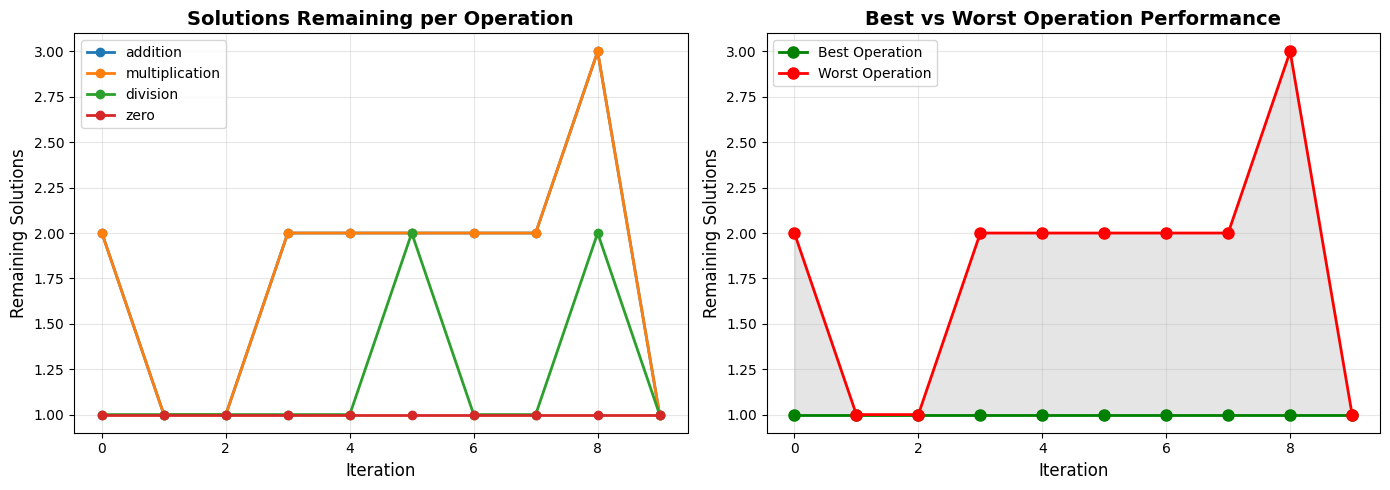

In [ ]:
tracker = OperationTracker(['addition', 'multiplication', 'division', 'zero'])

for _ in range(10):
        
    # Assign numbers to peoples (variables)
    my_numbers = randint(1, 100 + 1)
    # my_numbers = 5
    numbers = {"K": my_numbers, "L": randint(1, 100 + 1), "X": randint(1, 100 + 1)}
    me = "K"

    problem = Problem()
    problem.addVariables(numbers.keys(), range(1, 100 + 1))

    # Add addition to minize the posibilities first

    other_person = "L"

    random_entrypoint = randint(0,1)
    operation_result = addition(numbers[me], numbers[other_person])
    print(operation_result)
    add_constraint_for_addition(
        problem, operation_result, me, other_person
    )

    # if random_entrypoint == 0:
    #     
    # else:
    #     operation_result = multiplication(numbers[me], numbers[other_person])
    #     print(operation_result)
    #     add_constraint_for_multiplication(
    #        problem, operation_result, me, other_person
    #     )

    # if (operation_result % 5 == 0):

    operation_result = division(numbers[me], numbers[other_person])
    print(operation_result)
    add_constraint_for_division(
        problem, operation_result, me, other_person
    )
    
    # else:

    operation_result = multiplication(numbers[me], numbers[other_person])
    print(operation_result)
    add_constraint_for_multiplication(
        problem, operation_result, me, other_person
    )


    operation_result = zero(numbers[me], numbers[other_person])
    print(operation_result)
    add_constraint_for_zero(
        problem, operation_result, me, other_person
    )

    other_person = "X"

    operation_result = addition(numbers[me], numbers[other_person])
    print(operation_result)
    add_constraint_for_addition(
        problem, operation_result, me, other_person
    )

    operation_result = multiplication(numbers[me], numbers[other_person])
    print(operation_result)
    add_constraint_for_multiplication(
        problem, operation_result, me, other_person
    )

    # operation_result = division(numbers[me], numbers[other_person])
    # print(operation_result)
    # add_constraint_for_division(
    #     problem, operation_result, me, other_person
    # )

    # operation_result = zero(numbers[me], numbers[other_person])
    # print(operation_result)
    # add_constraint_for_zero(
    #     problem, operation_result, me, other_person
    # )


    solution_dicts = problem.getSolutions()


    simulations = [
        {
            "operation": addition,
            "constraint": add_constraint_for_addition,
        },
        {
            "operation": multiplication,
            "constraint": add_constraint_for_multiplication,
        },
        {
            "operation": division,
            "constraint": add_constraint_for_division,
        },
        {
            "operation": zero,
            "constraint": add_constraint_for_zero,
        },
    ]

    possibilities = []

    for simulation in simulations:
        operation = simulation["operation"]
        constraint = simulation["constraint"]

        new_problem = copy.deepcopy(problem)
        constraint(new_problem, operation(numbers[me], numbers[other_person]), me, other_person)
        possibilities.append(
            len(get_solutions_for_one_variable(new_problem, me)),
        )

    tracker.add(possibilities)

print(tracker.classement())
tracker.plot()
    

# {
#     "result": numbers[me],
#     "problem": {
#         "length": len(get_solutions_for_one_variable(problem, me)),
#     },
#     "simulation": possibilities,
#     "solutions": get_solutions_for_one_variable(problem, me)
# }


In [551]:
# Assign numbers to peoples (variables)
my_numbers = randint(1, 100 + 1)
# my_numbers = 5
numbers = {"K": my_numbers, "L": randint(1, 100 + 1), "X": randint(1, 100 + 1)}
me = "K"

problem = Problem()
problem.addVariables(numbers.keys(), range(1, 100 + 1))

# Add addition to minize the posibilities first

other_person = "L"

random_entrypoint = randint(0,1)
operation_result = addition(numbers[me], numbers[other_person])
print(operation_result)
add_constraint_for_addition(
    problem, operation_result, me, other_person
)

# if random_entrypoint == 0:
#     
# else:
#     operation_result = multiplication(numbers[me], numbers[other_person])
#     print(operation_result)
#     add_constraint_for_multiplication(
#        problem, operation_result, me, other_person
#     )

# if (operation_result % 5 == 0):

operation_result = division(numbers[me], numbers[other_person])
print(operation_result)
add_constraint_for_division(
    problem, operation_result, me, other_person
)

# else:

operation_result = multiplication(numbers[me], numbers[other_person])
print(operation_result)
add_constraint_for_multiplication(
    problem, operation_result, me, other_person
)


operation_result = zero(numbers[me], numbers[other_person])
print(operation_result)
add_constraint_for_zero(
    problem, operation_result, me, other_person
)

other_person = "X"

operation_result = addition(numbers[me], numbers[other_person])
print(operation_result)
add_constraint_for_addition(
    problem, operation_result, me, other_person
)

operation_result = multiplication(numbers[me], numbers[other_person])
print(operation_result)
add_constraint_for_multiplication(
    problem, operation_result, me, other_person
)

# operation_result = division(numbers[me], numbers[other_person])
# print(operation_result)
# add_constraint_for_division(
#     problem, operation_result, me, other_person
# )

# operation_result = zero(numbers[me], numbers[other_person])
# print(operation_result)
# add_constraint_for_zero(
#     problem, operation_result, me, other_person
# )


solution_dicts = problem.getSolutions()


simulations = [
    {
        "operation": addition,
        "constraint": add_constraint_for_addition,
    },
    {
        "operation": multiplication,
        "constraint": add_constraint_for_multiplication,
    },
    {
        "operation": division,
        "constraint": add_constraint_for_division,
    },
    {
        "operation": zero,
        "constraint": add_constraint_for_zero,
    },
]

possibilities = []

for simulation in simulations:
    operation = simulation["operation"]
    constraint = simulation["constraint"]

    new_problem = copy.deepcopy(problem)
    constraint(new_problem, operation(numbers[me], numbers[other_person]), me, other_person)
    possibilities.append(
        len(get_solutions_for_one_variable(new_problem, me)),
    )


{
    "result": numbers[me],
    "problem": {
        "length": len(get_solutions_for_one_variable(problem, me)),
    },
    "simulation": possibilities,
    "solutions": get_solutions_for_one_variable(problem, me)
}

56
17
9
5
79
8


{'result': 53,
 'problem': {'length': 2},
 'simulation': [2, 2, 1, 1],
 'solutions': {3, 53}}

In [417]:
me = "K"
hidden_numbers = {me: 80, "L": 100}
problem = Problem()
problem.addVariables(hidden_numbers.keys(), range(1, 100 + 1))

result = addition(hidden_numbers[me], hidden_numbers["L"])
print(result)

add_constraint_for_addition(problem, result, me, "L")

# get_solutions_for_one_variable(problem, me)
# problem.getSolutions()

197


In [516]:
a = 90
b = randint(0,101)
(
a,b,
division(a,b)
)

(90, 19, 4)